<a href="https://colab.research.google.com/github/Ben-Judas/Capstone-s-Project/blob/main/Contraceptive_Project_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

<font color='white'> <div style="text-align: justifie"> **To highlight the determinants of modern contraceptive practice among married women who were not pregnant during 2016-2017**</p></font>

<font color='white'> <div style="text-align: justifie">**To identify the determinants of modern contraceptive practice among married women who are not pregnant during the period 2016-2017. The project starts from the observation that the contraceptive demand is unsatisfactory with a low satisfaction rate of 72%, exacerbated by the lack of access to health care. In particular, the proportion of women in union using contraception has increased from 22% in 2000 to 32% in 2016. Despite all this, Haiti remains the country with the highest level of unmet need for family planning and the lowest use of modern contraception in the Latin America and Caribbean region. For personal reasons, this project targets married women who were not expecting children at the time of the survey. In fact, only 35% of currently married women use any method, and of these, 31% use a modern method**.</div>

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

 <font color='white'>**My project aims to question married women's choice to use modern contraceptive methods. In other words, does any socio-economic characteristics of the household influence the choice of women using modern contraceptive methods ?**

# Data Explication
**1878 0bservations and 24 variables has been choosen for in this process**


**The features variables are :**

* Region :


* Type_of_place_of_residence:



* Highest_educational_level:



* Religion:



* Wealth_index_combined:


* Knowledge_of_ovulatory_cycle:


* Current_contraceptive_method:


* Current_use_by_method_type:


* At_health_facility_told_of_family_planning:

* Contraception_is_woman_s_business_man_should_not_worry:


* Women_who_use_contraception_become_promiscuous:


 * Fertility_preference:


 * Husband_partner_s_occupation:


 * Respondent_currently_working:


 * Respondent_earns_more_than_husband_partner:


 * Total_lifetime_number_of_sex_partners:


 * Years_since_first_cohabitation:


 * Age_at_first_cohabitation:


 * Number_of_living_children:


 * Age_of_respondent_at_1st_birth:


 * Husband_partner_s_age:


 * Respondent_s_current_age:


 * Number_of_household_members:


 * Number_of_children_5_and_under_in_household:


**The target variable is :**
 *  Use_method:

 
 In terms of analysis, the objective is to verify the following hypotheses: The married woman’s choice of a modern contraceptive method (MCM) is characterized by:

* The educational level (+)
* Number of children (+)
* Number of partners (+)
* Woman's age (-)
* Husband's age (-)
* Professional activity (-)
* Sexual activity (+)
* Religion ()
* Number of household members (+)
* Perception about contraception (+)
* Fertility preference (-)




# I. PACKAGES

In [152]:
# for data analysis
import pandas as pd
# vector manipulation
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# import colorama
#from colorama import Fore

# statistic stest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import folium as f
import plotly as pl

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# python parameters
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

# II. DATA CLEANING

## 1. LOAD DATA

In [153]:
df = pd.read_excel("contraceptive.xlsx")

In [154]:
# display fisrt five rows
df.head()

,Respondent's current age,Region,Type of place of residence,Highest educational level,Religion,Number of household members,Number of children 5 and under in household,Number of trips in last 12 months,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Knowledge of ovulatory cycle,Total children ever born,Age of most recent child,Contraceptive use and intention,Heard family planning on radio last few months,Heard family planning on TV last few months,Visited health facility last 12 months,"Contraception is woman's business, man should not worry",Women who use contraception become promiscuous,Covered by health insurance,More than once unions,Age at first cohabitation,Age at first sex,Recent sexual activity,Husband's desire for children,Unmet need for contraception,Husband/partner's education level,Husband/partner's occupation,Respondent's occupation,Husband/partner's age,Person who usually decides on respondent's health care,Total lifetime number of sex partners
0,31,Sud,Rural,Primary,Catholic,4,2,1,Middle,3,19.00,After period ended,3,1.00,Non_user _intends to use later,No,No,Yes,Disagree,Disagree,No,0,27,15,Active in last 4 weeks,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales,31,Husband/partner alone,2
1,38,Sud,Rural,Higher,Catholic,5,1,0,Middle,1,31.00,Middle of the cycle,3,3.00,Using_modern_method,No,No,Yes,Agree,Disagree,No,0,29,18,Active in last 4 weeks,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,39,Respondent and husband/partner,2
2,38,Sud,Rural,Secondary,Protestant,6,1,1,Middle,1,28.00,After period ended,4,1.00,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,28,24,Active in last 4 weeks,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,36,Husband/partner alone,2
3,35,Sud,Rural,Secondary,Catholic,6,0,0,Middle,0,23.00,After period ended,4,7.00,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,22,18,Active in last 4 weeks,Husband wants more,Spacing,Secondary,Skilled manual,Sales,42,Husband/partner alone,2
4,37,Sud,Rural,Secondary,Catholic,7,1,1,Poorer,1,18.00,After period ended,5,3.00,Using_modern_method,No,No,No,Agree,Agree,No,0,18,17,Active in last 4 weeks,Husband wants more,Limiting,No education,Agricultural - self employed,Sales,53,Respondent and husband/partner,2


In [155]:
# transform variable name with separators '_'
df.columns = [column.replace(" ", "_").replace("/", "_").replace("'", "_").replace(",", "") for column in df.columns]
df.columns


Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Number_of_trips_in_last_12_months', 'Wealth_index_combined', 'Births_in_last_five_years',
       'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle', 'Total_children_ever_born', 'Age_of_most_recent_child',
       'Contraceptive_use_and_intention', 'Heard_family_planning_on_radio_last_few_months', 'Heard_family_planning_on_TV_last_few_months',
       'Visited_health_facility_last_12_months', 'Contraception_is_woman_s_business_man_should_not_worry',
       'Women_who_use_contraception_become_promiscuous', 'Covered_by_health_insurance', 'More_than_once_unions', 'Age_at_first_cohabitation',
       'Age_at_first_sex', 'Recent_sexual_activity', 'Husband_s_desire_for_children', 'Unmet_need_for_contraception',
       'Husband_partner_s_education_level', 'Husband_partner_s_occupation

In [156]:
df.head()

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_trips_in_last_12_months,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Total_children_ever_born,Age_of_most_recent_child,Contraceptive_use_and_intention,Heard_family_planning_on_radio_last_few_months,Heard_family_planning_on_TV_last_few_months,Visited_health_facility_last_12_months,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Age_at_first_sex,Recent_sexual_activity,Husband_s_desire_for_children,Unmet_need_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Person_who_usually_decides_on_respondent_s_health_care,Total_lifetime_number_of_sex_partners
0,31,Sud,Rural,Primary,Catholic,4,2,1,Middle,3,19.00,After period ended,3,1.00,Non_user _intends to use later,No,No,Yes,Disagree,Disagree,No,0,27,15,Active in last 4 weeks,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales,31,Husband/partner alone,2
1,38,Sud,Rural,Higher,Catholic,5,1,0,Middle,1,31.00,Middle of the cycle,3,3.00,Using_modern_method,No,No,Yes,Agree,Disagree,No,0,29,18,Active in last 4 weeks,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,39,Respondent and husband/partner,2
2,38,Sud,Rural,Secondary,Protestant,6,1,1,Middle,1,28.00,After period ended,4,1.00,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,28,24,Active in last 4 weeks,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,36,Husband/partner alone,2
3,35,Sud,Rural,Secondary,Catholic,6,0,0,Middle,0,23.00,After period ended,4,7.00,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,22,18,Active in last 4 weeks,Husband wants more,Spacing,Secondary,Skilled manual,Sales,42,Husband/partner alone,2
4,37,Sud,Rural,Secondary,Catholic,7,1,1,Poorer,1,18.00,After period ended,5,3.00,Using_modern_method,No,No,No,Agree,Agree,No,0,18,17,Active in last 4 weeks,Husband wants more,Limiting,No education,Agricultural - self employed,Sales,53,Respondent and husband/partner,2


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Respondent_s_current_age                                3033 non-null   int64  
 1   Region                                                  3033 non-null   object 
 2   Type_of_place_of_residence                              3033 non-null   object 
 3   Highest_educational_level                               3033 non-null   object 
 4   Religion                                                3033 non-null   object 
 5   Number_of_household_members                             3033 non-null   int64  
 6   Number_of_children_5_and_under_in_household             3033 non-null   int64  
 7   Number_of_trips_in_last_12_months                       3033 non-null   int64  
 8   Wealth_index_combined                 

In [158]:
#Fonksyon pou detekte valè ki manke
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [159]:
# Check null values
missing = missing_values_table(df)
missing

Your selected dataframe has 33 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age_of_most_recent_child,190,6.30
Age_of_respondent_at_1st_birth,163,5.40


## 2. OVERVIEW

In [160]:
    ''' this function help us to show overview from the dataset'''
    
    def dataoveriew(df, message):
     print(f'{message}:\n')
     print('Number of observations: ', df.shape[0])
     print("\nNumber of features:", df.shape[1])
     print("\nData Features:")
     print("\nMissing values:", df.isnull().sum().values.sum())
     print("\nUnique values:")
     print(df.nunique())

In [161]:
# showing overview
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of observations:  3033

Number of features: 33

Data Features:

Missing values: 353

Unique values:
Respondent_s_current_age                                  34
Region                                                    11
Type_of_place_of_residence                                 2
Highest_educational_level                                  4
Religion                                                   5
                                                          ..
Husband_partner_s_occupation                               8
Respondent_s_occupation                                    8
Husband_partner_s_age                                     48
Person_who_usually_decides_on_respondent_s_health_care     3
Total_lifetime_number_of_sex_partners                     13
Length: 33, dtype: int64


In [162]:
# Check for duplicated columns
df[df.duplicated()].value_counts()

Series([], dtype: int64)

In [163]:
# Check null values
df.isnull().sum()

Respondent_s_current_age                                  0
Region                                                    0
Type_of_place_of_residence                                0
Highest_educational_level                                 0
Religion                                                  0
                                                         ..
Husband_partner_s_occupation                              0
Respondent_s_occupation                                   0
Husband_partner_s_age                                     0
Person_who_usually_decides_on_respondent_s_health_care    0
Total_lifetime_number_of_sex_partners                     0
Length: 33, dtype: int64

In [164]:
na_val = df.isnull().sum().value_counts()
na_val

0      31
190     1
163     1
dtype: int64

In [165]:
#Fonksyon pou detekte valè ki manke
def na_values_table(df):
        mis_val = df.isna().sum()
        mis_val_percent = 100 * df.isna().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] > 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [166]:
na_values_table(df)

Your selected dataframe has 33 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age_of_most_recent_child,190,6.30
Age_of_respondent_at_1st_birth,163,5.40


In [167]:
# replacing na values in Age_of_most_recent_child
df["Age_of_most_recent_child"].fillna(df['Age_of_most_recent_child'].mean(), inplace = True)

In [168]:
# replacing na values in Age_of_respondent_at_1st_birth
df["Age_of_respondent_at_1st_birth"].fillna(df['Age_of_respondent_at_1st_birth'].mean(), inplace = True)

In [169]:
na_values_table(df)

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [170]:
df['Unmet_need_for_contraception'].unique()

array(['Limiting', 'Spacing', 'No unmet need'], dtype=object)

In [171]:
df.replace({'Limiting': 'Yes', 'Spacing': 'Yes', 'No unmet need': 'No'}, inplace=True)

In [172]:
df['Unmet_need_for_contraception'].unique()

array(['Yes', 'No'], dtype=object)

  * **There are 1878 observations and 25 features in this dataset**

**There is :**
  * **No Null values**
  * **Missing values**
  * **Duplicated values**

In [173]:
df.dtypes.value_counts()

object     20
int64      11
float64     2
dtype: int64

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Respondent_s_current_age                                3033 non-null   int64  
 1   Region                                                  3033 non-null   object 
 2   Type_of_place_of_residence                              3033 non-null   object 
 3   Highest_educational_level                               3033 non-null   object 
 4   Religion                                                3033 non-null   object 
 5   Number_of_household_members                             3033 non-null   int64  
 6   Number_of_children_5_and_under_in_household             3033 non-null   int64  
 7   Number_of_trips_in_last_12_months                       3033 non-null   int64  
 8   Wealth_index_combined                 

In [175]:
# describe the variables by simple statistic
include =['object', 'float', 'int'] 
df.describe( include = include)

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_trips_in_last_12_months,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Total_children_ever_born,Age_of_most_recent_child,Contraceptive_use_and_intention,Heard_family_planning_on_radio_last_few_months,Heard_family_planning_on_TV_last_few_months,Visited_health_facility_last_12_months,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Age_at_first_sex,Recent_sexual_activity,Husband_s_desire_for_children,Unmet_need_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Person_who_usually_decides_on_respondent_s_health_care,Total_lifetime_number_of_sex_partners
count,3033.00,3033,3033,3033,3033,3033.00,3033.00,3033.00,3033,3033.00,3033.00,3033,3033.00,3033.00,3033,3033,3033,3033,3033,3033,3033,3033.00,3033.00,3033.00,3033,3033,3033,3033,3033,3033,3033.00,3033,3033.00
unique,nan,11,2,4,5,nan,nan,nan,5,nan,nan,7,nan,nan,3,2,2,2,3,3,2,nan,nan,nan,3,4,2,5,8,8,nan,3,nan
top,nan,Artibonite,Rural,Primary,Protestant,nan,nan,nan,Poorest,nan,nan,After period ended,nan,nan,Using_modern_method,No,No,Yes,Disagree,Disagree,No,nan,nan,nan,Active in last 4 weeks,Both want same,Yes,Primary,Agricultural - self employed,Sales,nan,Respondent and husband/partner,nan
freq,nan,357,2067,1180,1559,nan,nan,nan,778,nan,nan,1777,nan,nan,1106,2405,2826,1869,2460,2107,2870,nan,nan,nan,2614,1582,2226,1132,1306,1758,nan,1752,nan
mean,34.14,NaN,NaN,NaN,NaN,5.59,1.00,1.29,NaN,0.78,20.83,NaN,4.00,4.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,21.09,17.15,NaN,NaN,NaN,NaN,NaN,NaN,39.84,NaN,2.27
std,8.33,NaN,NaN,NaN,NaN,2.28,0.95,4.67,NaN,0.81,4.30,NaN,3.16,4.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,4.93,3.25,NaN,NaN,NaN,NaN,NaN,NaN,9.73,NaN,1.48
min,16.00,NaN,NaN,NaN,NaN,2.00,0.00,0.00,NaN,0.00,11.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,1.00
25%,27.00,NaN,NaN,NaN,NaN,4.00,0.00,0.00,NaN,0.00,18.00,NaN,2.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,18.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,32.00,NaN,1.00
50%,34.00,NaN,NaN,NaN,NaN,5.00,1.00,0.00,NaN,1.00,20.00,NaN,3.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,20.00,17.00,NaN,NaN,NaN,NaN,NaN,NaN,39.00,NaN,2.00
75%,41.00,NaN,NaN,NaN,NaN,7.00,2.00,1.00,NaN,1.00,23.00,NaN,6.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,24.00,18.00,NaN,NaN,NaN,NaN,NaN,NaN,47.00,NaN,3.00


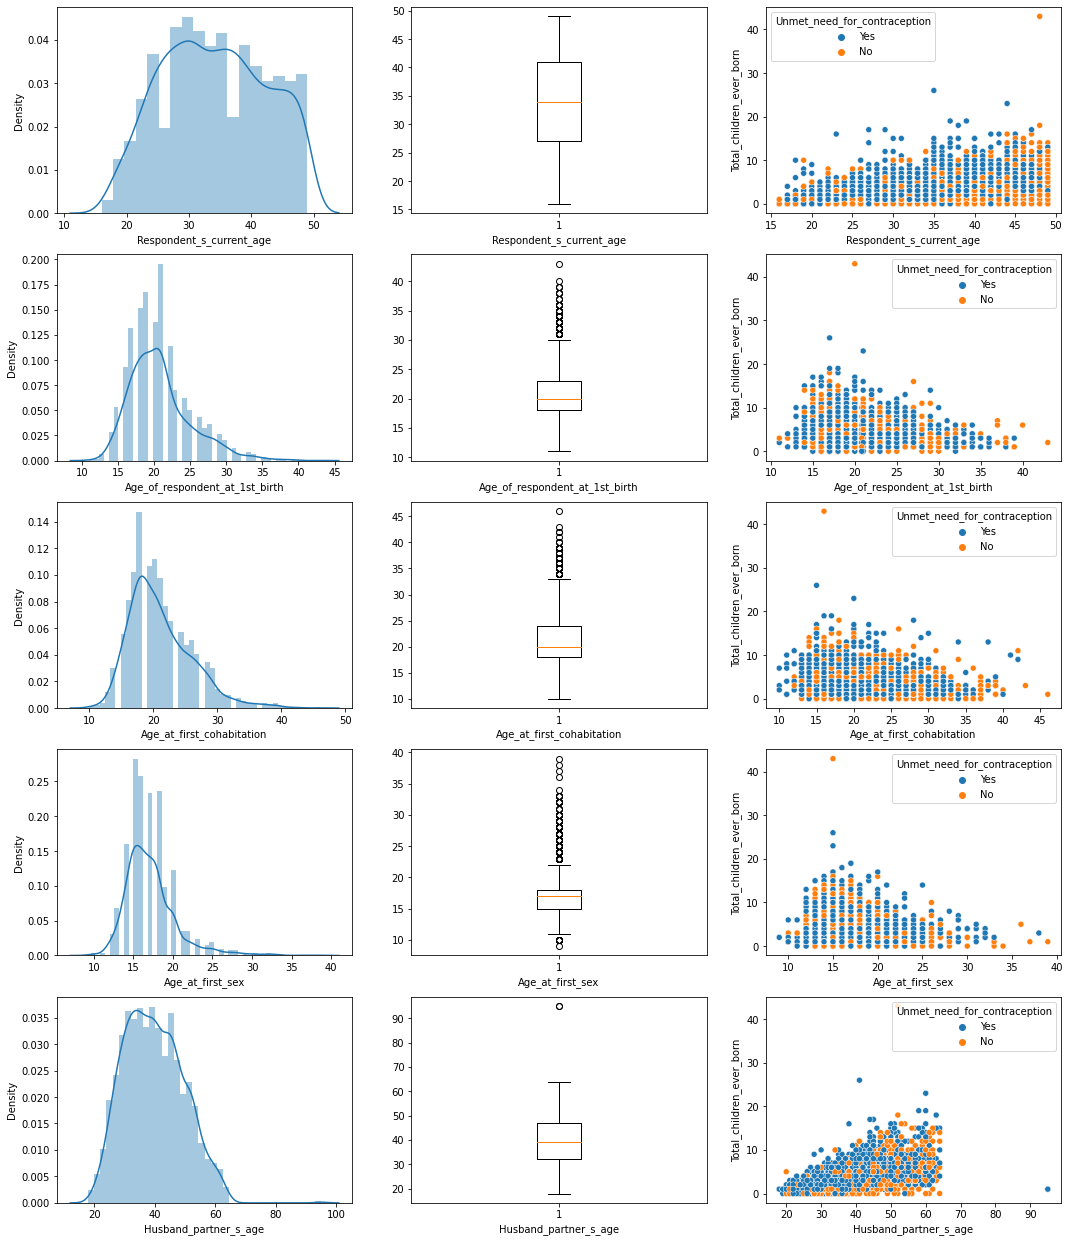

In [176]:
#  Numerical Data
con = ['Respondent_s_current_age',
 'Age_of_respondent_at_1st_birth',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age']

#  plot Numerical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,22))

for i in con:
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'Total_children_ever_born', hue = 'Unmet_need_for_contraception')
    c = c + 1

In [177]:
df.columns.tolist()

['Respondent_s_current_age',
 'Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Contraceptive_use_and_intention',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupatio

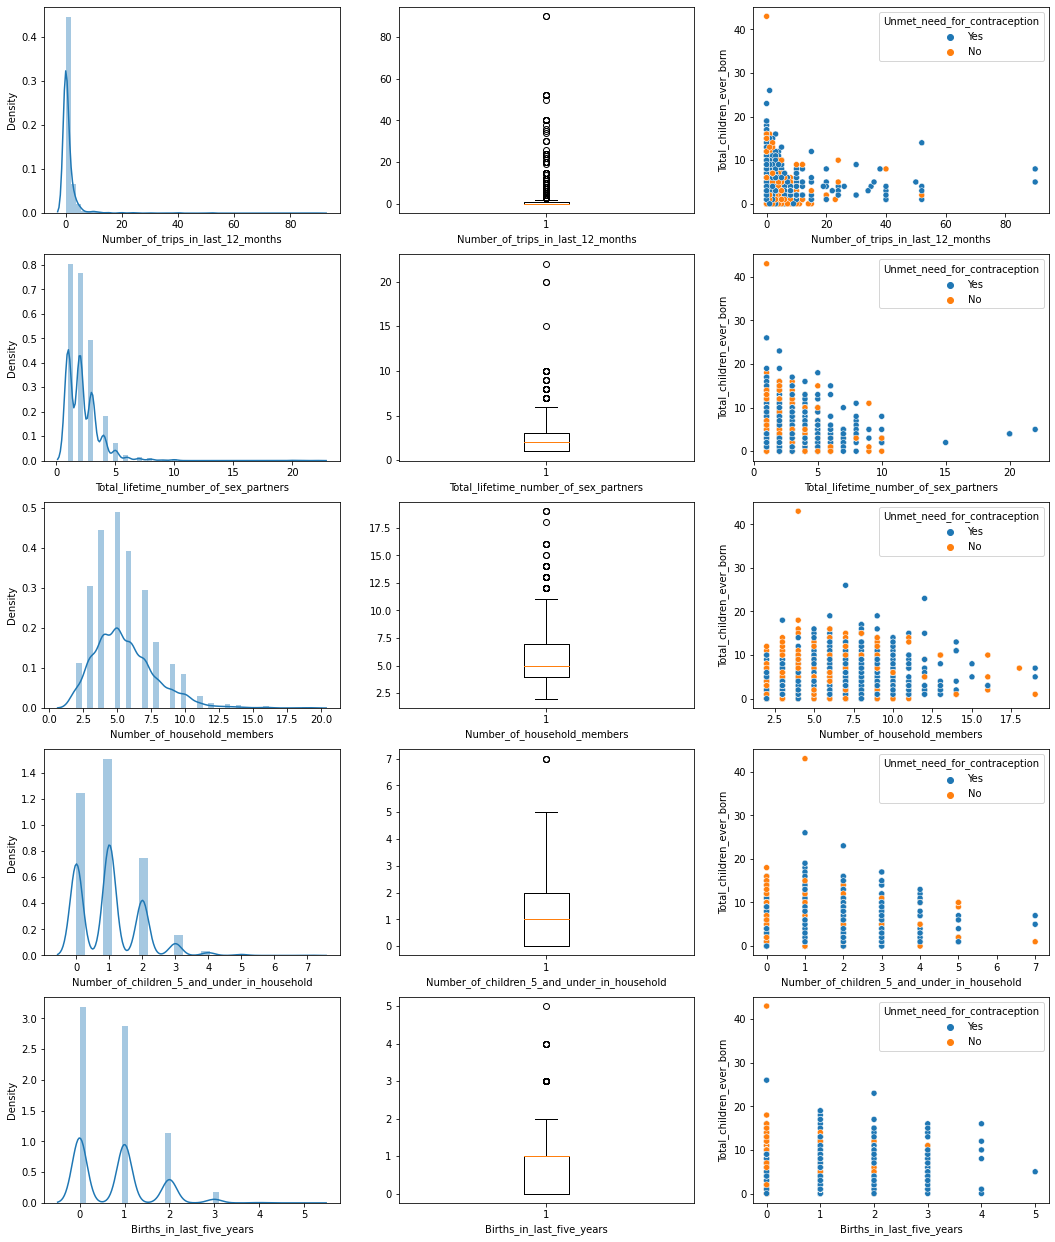

In [178]:
#  Numerical Data
con = ['Number_of_trips_in_last_12_months',
 'Total_lifetime_number_of_sex_partners',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years']

#  plot Numerical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,22))

for i in con:
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'Total_children_ever_born', hue = 'Unmet_need_for_contraception')
    c = c + 1

In [179]:
method = df.copy(deep=True)
# count column values
for col in method.columns:
  print(f"{col} = {df[col].nunique()}")

Respondent_s_current_age = 34
Region = 11
Type_of_place_of_residence = 2
Highest_educational_level = 4
Religion = 5
Number_of_household_members = 17
Number_of_children_5_and_under_in_household = 7
Number_of_trips_in_last_12_months = 30
Wealth_index_combined = 5
Births_in_last_five_years = 6
Age_of_respondent_at_1st_birth = 32
Knowledge_of_ovulatory_cycle = 7
Total_children_ever_born = 23
Age_of_most_recent_child = 31
Contraceptive_use_and_intention = 3
Heard_family_planning_on_radio_last_few_months = 2
Heard_family_planning_on_TV_last_few_months = 2
Visited_health_facility_last_12_months = 2
Contraception_is_woman_s_business_man_should_not_worry = 3
Women_who_use_contraception_become_promiscuous = 3
Covered_by_health_insurance = 2
More_than_once_unions = 2
Age_at_first_cohabitation = 35
Age_at_first_sex = 30
Recent_sexual_activity = 3
Husband_s_desire_for_children = 4
Unmet_need_for_contraception = 2
Husband_partner_s_education_level = 5
Husband_partner_s_occupation = 8
Respondent_s_oc

##**DATA TRANSFORMATION**

In [180]:
binary_col = [col for col in method.columns if df[col].nunique()==2]
binary_col

['Type_of_place_of_residence',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Unmet_need_for_contraception']

In [181]:
multi_col = [col for col in method.columns if df[col].nunique()>2]
multi_col

['Respondent_s_current_age',
 'Region',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Contraceptive_use_and_intention',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Husband_partner_s_age',
 'Person_who_usually_decides_on_respondent_s_health_care',
 'Total_lifetime_number_of_sex_partners']

In [182]:
method[multi_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Respondent_s_current_age,3033.00,34.14,8.33,16.00,27.00,34.00,41.00,49.00
Number_of_household_members,3033.00,5.59,2.28,2.00,4.00,5.00,7.00,19.00
Number_of_children_5_and_under_in_household,3033.00,1.00,0.95,0.00,0.00,1.00,2.00,7.00
Number_of_trips_in_last_12_months,3033.00,1.29,4.67,0.00,0.00,0.00,1.00,90.00
Births_in_last_five_years,3033.00,0.78,0.81,0.00,0.00,1.00,1.00,5.00
Age_of_respondent_at_1st_birth,3033.00,20.83,4.30,11.00,18.00,20.00,23.00,43.00
Total_children_ever_born,3033.00,4.00,3.16,0.00,2.00,3.00,6.00,43.00
Age_of_most_recent_child,3033.00,4.91,4.85,0.00,1.00,4.00,7.00,30.00
Age_at_first_cohabitation,3033.00,21.09,4.93,10.00,18.00,20.00,24.00,46.00
Age_at_first_sex,3033.00,17.15,3.25,9.00,15.00,17.00,18.00,39.00


In [183]:
method[binary_col].describe()

,More_than_once_unions
count,3033.00
mean,0.22
std,0.41
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


In [184]:
def meancol(col):
  for col in method.columns:
    method[col]=pd.cut(df[col],2,labels=['Young','No_Young'])
    return method[col]

In [185]:
method['Respondent_s_current_age']=pd.cut(method['Respondent_s_current_age'],2,labels=['Low','High'])
method['Number_of_household_members']=pd.cut(method['Number_of_household_members'],2,labels=['Low','High'])
method['Number_of_children_5_and_under_in_household']=pd.cut(method['Number_of_children_5_and_under_in_household'],2,labels=['Low','High'])
method['Number_of_trips_in_last_12_months']=pd.cut(method['Number_of_trips_in_last_12_months'],2,labels=['Low','High'])
method['Births_in_last_five_years']=pd.cut(method['Births_in_last_five_years'],2,labels=['Low','High'])
method['Age_of_respondent_at_1st_birth']=pd.cut(method['Age_of_respondent_at_1st_birth'],2,labels=['Low','High'])
method['Total_children_ever_born']=pd.cut(method['Total_children_ever_born'],2,labels=['Low','High'])
method['Age_of_most_recent_child']=pd.cut(method['Age_of_most_recent_child'],2,labels=['Low','High'])
method['Age_at_first_cohabitation']=pd.cut(method['Age_at_first_cohabitation'],2,labels=['Low','High'])
method['Age_at_first_sex']=pd.cut(method['Age_at_first_sex'],2,labels=['Low','High'])
method['Husband_partner_s_age']=pd.cut(method['Husband_partner_s_age'],2,labels=['Low','High'])
method['Total_lifetime_number_of_sex_partners']=pd.cut(method['Total_lifetime_number_of_sex_partners'],2,labels=['Low','High'])

In [186]:
# Descriptive Analysis of qualitative variables
var = df[binary_col].describe(include=[object]).T
#varcat['%'] = varcat['freq']/varcat['count']*100
var

,count,unique,top,freq
Type_of_place_of_residence,3033,2,Rural,2067
Heard_family_planning_on_radio_last_few_months,3033,2,No,2405
Heard_family_planning_on_TV_last_few_months,3033,2,No,2826
Visited_health_facility_last_12_months,3033,2,Yes,1869
Covered_by_health_insurance,3033,2,No,2870
Unmet_need_for_contraception,3033,2,Yes,2226


In [187]:
method.head()

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_trips_in_last_12_months,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Total_children_ever_born,Age_of_most_recent_child,Contraceptive_use_and_intention,Heard_family_planning_on_radio_last_few_months,Heard_family_planning_on_TV_last_few_months,Visited_health_facility_last_12_months,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Age_at_first_sex,Recent_sexual_activity,Husband_s_desire_for_children,Unmet_need_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Person_who_usually_decides_on_respondent_s_health_care,Total_lifetime_number_of_sex_partners
0,Low,Sud,Rural,Primary,Catholic,Low,Low,Low,Middle,High,Low,After period ended,Low,Low,Non_user _intends to use later,No,No,Yes,Disagree,Disagree,No,0,Low,Low,Active in last 4 weeks,Husband wants more,Yes,Primary,Professional/technical/managerial,Sales,Low,Husband/partner alone,Low
1,High,Sud,Rural,Higher,Catholic,Low,Low,Low,Middle,Low,High,Middle of the cycle,Low,Low,Using_modern_method,No,No,Yes,Agree,Disagree,No,0,High,Low,Active in last 4 weeks,Both want same,Yes,Higher,Professional/technical/managerial,Professional/technical/managerial,Low,Respondent and husband/partner,Low
2,High,Sud,Rural,Secondary,Protestant,Low,Low,Low,Middle,Low,High,After period ended,Low,Low,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,Low,Low,Active in last 4 weeks,Both want same,Yes,Secondary,Professional/technical/managerial,Not working,Low,Husband/partner alone,Low
3,High,Sud,Rural,Secondary,Catholic,Low,Low,Low,Middle,Low,Low,After period ended,Low,Low,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,Low,Low,Active in last 4 weeks,Husband wants more,Yes,Secondary,Skilled manual,Sales,Low,Husband/partner alone,Low
4,High,Sud,Rural,Secondary,Catholic,Low,Low,Low,Poorer,Low,Low,After period ended,Low,Low,Using_modern_method,No,No,No,Agree,Agree,No,0,Low,Low,Active in last 4 weeks,Husband wants more,Yes,No education,Agricultural - self employed,Sales,Low,Respondent and husband/partner,Low


In [188]:
method=pd.get_dummies(method)
method.head()

,More_than_once_unions,Respondent_s_current_age_Low,Respondent_s_current_age_High,Region_Aire Metropolitaine,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Type_of_place_of_residence_Rural,Type_of_place_of_residence_Urban,Highest_educational_level_Higher,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Other,Religion_Protestant,Religion_Vaudousant,Number_of_household_members_Low,Number_of_household_members_High,Number_of_children_5_and_under_in_household_Low,Number_of_children_5_and_under_in_household_High,Number_of_trips_in_last_12_months_Low,Number_of_trips_in_last_12_months_High,Wealth_index_combined_Middle,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Births_in_last_five_years_Low,Births_in_last_five_years_High,Age_of_respondent_at_1st_birth_Low,Age_of_respondent_at_1st_birth_High,Knowledge_of_ovulatory_cycle_After period ended,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_Don't know,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Knowledge_of_ovulatory_cycle_Other,Total_children_ever_born_Low,Total_children_ever_born_High,Age_of_most_recent_child_Low,Age_of_most_recent_child_High,Contraceptive_use_and_intention_Does_not_intend to use,Contraceptive_use_and_intention_Non_user _intends to use later,Contraceptive_use_and_intention_Using_modern_method,Heard_family_planning_on_radio_last_few_months_No,Heard_family_planning_on_radio_last_few_months_Yes,Heard_family_planning_on_TV_last_few_months_No,Heard_family_planning_on_TV_last_few_months_Yes,Visited_health_facility_last_12_months_No,Visited_health_facility_last_12_months_Yes,Contraception_is_woman_s_business_man_should_not_worry_Agree,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Contraception_is_woman_s_business_man_should_not_worry_Don't know,Women_who_use_contraception_become_promiscuous_Agree,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_No,Covered_by_health_insurance_Yes,Age_at_first_cohabitation_Low,Age_at_first_cohabitation_High,Age_at_first_sex_Low,Age_at_first_sex_High,Recent_sexual_activity_Active in last 4 weeks,Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence,Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence,Husband_s_desire_for_children_Both want same,Husband_s_desire_for_children_Don't know,Husband_s_desire_for_children_Husband wants fewer,Husband_s_desire_for_children_Husband wants more,Unmet_need_for_contraception_No,Unmet_need_for_contraception_Yes,Husband_partner_s_education_level_Don't know,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Husband_partner_s_occupation_Agricultural - self employed,Husband_partner_s_occupation_Did not work,Husband_partner_s_occupation_Household and domestic,Husband_partner_s_occupation_Other,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales,Husband_partner_s_occupation_Skilled manual,Husband_partner_s_occupation_Unskilled manual,Respondent_s_occupation_Agricultural - self employed,Respondent_s_occupation_Household and domestic,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales,Respondent_s_occupation_Skilled manual,Respondent_s_occupation_Unskilled manual,Husband_partner_s_age_Low,Husband_partner_s_age_High,Person_who_usually_decides_on_respondent_s_health_care_Husband/partner alone,Person_

In [189]:
method.columns.tolist()

['More_than_once_unions',
 'Respondent_s_current_age_Low',
 'Respondent_s_current_age_High',
 'Region_Aire Metropolitaine',
 'Region_Artibonite',
 'Region_Centre',
 "Region_Grand'Anse",
 'Region_Nippes',
 'Region_Nord',
 'Region_Nord-Est',
 'Region_Nord-Ouest',
 'Region_Rest-Ouest',
 'Region_Sud',
 'Region_Sud-Est',
 'Type_of_place_of_residence_Rural',
 'Type_of_place_of_residence_Urban',
 'Highest_educational_level_Higher',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secondary',
 'Religion_Catholic',
 'Religion_No religion',
 'Religion_Other',
 'Religion_Protestant',
 'Religion_Vaudousant',
 'Number_of_household_members_Low',
 'Number_of_household_members_High',
 'Number_of_children_5_and_under_in_household_Low',
 'Number_of_children_5_and_under_in_household_High',
 'Number_of_trips_in_last_12_months_Low',
 'Number_of_trips_in_last_12_months_High',
 'Wealth_index_combined_Middle',
 'Wealth_index_combined_Poorer',
 'Wealt

In [190]:
dataselected=['More_than_once_unions',
 'Respondent_s_current_age_Low',
 'Respondent_s_current_age_High',
 'Region_Aire Metropolitaine',
 'Region_Artibonite',
 'Region_Centre',
 "Region_Grand'Anse",
 'Region_Nippes',
 'Region_Nord',
 'Region_Nord-Est',
 'Region_Nord-Ouest',
 'Region_Rest-Ouest',
 'Region_Sud',
 'Region_Sud-Est',
 'Type_of_place_of_residence_Rural',
 'Type_of_place_of_residence_Urban',
 'Highest_educational_level_Higher',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secondary',
 'Religion_Catholic',
 'Religion_No religion',
 'Religion_Other',
 'Religion_Protestant',
 'Religion_Vaudousant',
 'Number_of_household_members_Low',
 'Number_of_household_members_High',
 'Number_of_children_5_and_under_in_household_Low',
 'Number_of_children_5_and_under_in_household_High',
 'Number_of_trips_in_last_12_months_Low',
 'Number_of_trips_in_last_12_months_High',
 'Wealth_index_combined_Middle',
 'Wealth_index_combined_Poorer',
 'Wealth_index_combined_Poorest',
 'Wealth_index_combined_Richer',
 'Wealth_index_combined_Richest',
 'Births_in_last_five_years_Low',
 'Births_in_last_five_years_High',
 'Age_of_respondent_at_1st_birth_Low',
 'Age_of_respondent_at_1st_birth_High',
 'Knowledge_of_ovulatory_cycle_After period ended',
 'Knowledge_of_ovulatory_cycle_At any time',
 'Knowledge_of_ovulatory_cycle_Before period begins',
 "Knowledge_of_ovulatory_cycle_Don't know",
 'Knowledge_of_ovulatory_cycle_During her period',
 'Knowledge_of_ovulatory_cycle_Middle of the cycle',
 'Knowledge_of_ovulatory_cycle_Other',
 'Total_children_ever_born_Low',
 'Total_children_ever_born_High',
 'Age_of_most_recent_child_Low',
 'Age_of_most_recent_child_High',
 'Contraceptive_use_and_intention_Does_not_intend to use',
 'Contraceptive_use_and_intention_Non_user _intends to use later',
 'Contraceptive_use_and_intention_Using_modern_method',
 'Heard_family_planning_on_radio_last_few_months_No',
 'Heard_family_planning_on_radio_last_few_months_Yes',
 'Heard_family_planning_on_TV_last_few_months_No',
 'Heard_family_planning_on_TV_last_few_months_Yes',
 'Visited_health_facility_last_12_months_No',
 'Visited_health_facility_last_12_months_Yes',
 'Contraception_is_woman_s_business_man_should_not_worry_Agree',
 'Contraception_is_woman_s_business_man_should_not_worry_Disagree',
 "Contraception_is_woman_s_business_man_should_not_worry_Don't know",
 'Women_who_use_contraception_become_promiscuous_Agree',
 'Women_who_use_contraception_become_promiscuous_Disagree',
 "Women_who_use_contraception_become_promiscuous_Don't know",
 'Covered_by_health_insurance_No',
 'Covered_by_health_insurance_Yes',
 'Age_at_first_cohabitation_Low',
 'Age_at_first_cohabitation_High',
 'Age_at_first_sex_Low',
 'Age_at_first_sex_High',
 'Recent_sexual_activity_Active in last 4 weeks',
 'Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence',
 'Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence',
 'Husband_s_desire_for_children_Both want same',
 "Husband_s_desire_for_children_Don't know",
 'Husband_s_desire_for_children_Husband wants fewer',
 'Husband_s_desire_for_children_Husband wants more',
 'Unmet_need_for_contraception_No',
 'Unmet_need_for_contraception_Yes',
 "Husband_partner_s_education_level_Don't know",
 'Husband_partner_s_education_level_Higher',
 'Husband_partner_s_education_level_No education',
 'Husband_partner_s_education_level_Primary',
 'Husband_partner_s_education_level_Secondary',
 'Husband_partner_s_occupation_Agricultural - self employed',
 'Husband_partner_s_occupation_Did not work',
 'Husband_partner_s_occupation_Household and domestic',
 'Husband_partner_s_occupation_Other',
 'Husband_partner_s_occupation_Professional/technical/managerial',
 'Husband_partner_s_occupation_Sales',
 'Husband_partner_s_occupation_Skilled manual',
 'Husband_partner_s_occupation_Unskilled manual',
 'Respondent_s_occupation_Agricultural - self employed',
 'Respondent_s_occupation_Household and domestic',
 'Respondent_s_occupation_Not working',
 'Respondent_s_occupation_Other',
 'Respondent_s_occupation_Professional/technical/managerial',
 'Respondent_s_occupation_Sales',
 'Respondent_s_occupation_Skilled manual',
 'Respondent_s_occupation_Unskilled manual',
 'Husband_partner_s_age_Low',
 'Husband_partner_s_age_High',
 'Person_who_usually_decides_on_respondent_s_health_care_Husband/partner alone',
 'Person_who_usually_decides_on_respondent_s_health_care_Respondent alone',
 'Person_who_usually_decides_on_respondent_s_health_care_Respondent and husband/partner',
 'Total_lifetime_number_of_sex_partners_Low',
 'Total_lifetime_number_of_sex_partners_High']

In [191]:
# Installing package for colored text
import sys
from termcolor import colored, cprint

In [192]:
def chisq(df,name):
    stat, p, df, arr = chi2_contingency(pd.crosstab(df, method.Unmet_need_for_contraception_Yes))
    if p < 0.05:
      print(colored('We can reject the Null Hypothesis for {}  {}'.format(name, p),'red'))
    else: 
      print(colored('We fail to reject the Null Hypothesis for {} {}'.format(name, p),'green'))

In [193]:
for i in method[dataselected].columns:
  chisq(method[i],i)

We fail to reject the Null Hypothesis for More_than_once_unions 0.050781079255928355
We can reject the Null Hypothesis for Respondent_s_current_age_Low  9.31204707594201e-11
We can reject the Null Hypothesis for Respondent_s_current_age_High  9.312047075941973e-11
We fail to reject the Null Hypothesis for Region_Aire Metropolitaine 0.49677213212937543
We can reject the Null Hypothesis for Region_Artibonite  0.012850386085602565
We fail to reject the Null Hypothesis for Region_Centre 0.7304026627564006
We fail to reject the Null Hypothesis for Region_Grand'Anse 0.891753926576409
We fail to reject the Null Hypothesis for Region_Nippes 0.15115100027180597
We fail to reject the Null Hypothesis for Region_Nord 0.3707912539803546
We fail to reject the Null Hypothesis for Region_Nord-Est 0.5041153509180474
We fail to reject the Null Hypothesis for Region_Nord-Ouest 0.3615672569604349
We fail to reject the Null Hypothesis for Region_Rest-Ouest 0.06250114979404728
We fail to reject the Null Hyp

In [194]:
datamodel=['Respondent_s_current_age_Low', 'Respondent_s_current_age_High',
           'Region_Artibonite', 'Highest_educational_level_Higher','Highest_educational_level_No education',
           'Highest_educational_level_Primary', 'Religion_Catholic', 'Religion_Protestant', 'Wealth_index_combined_Richest',
           'Births_in_last_five_years_Low',
           'Births_in_last_five_years_High',
           'Age_of_respondent_at_1st_birth_Low',
           'Age_of_respondent_at_1st_birth_High',
           'Age_of_most_recent_child_Low',
           'Age_of_most_recent_child_High',
            'Contraceptive_use_and_intention_Does_not_intend to use',
           'Contraceptive_use_and_intention_Non_user _intends to use later',
           'Contraceptive_use_and_intention_Using_modern_method',
           'Visited_health_facility_last_12_months_No',
           'Visited_health_facility_last_12_months_Yes',
           'Age_at_first_cohabitation_Low', 'Age_at_first_cohabitation_High',
           'Age_at_first_sex_Low', 'Age_at_first_sex_High',
           'Husband_partner_s_education_level_Higher',
           'Husband_partner_s_education_level_No education',
           'Husband_partner_s_education_level_Primary',
           'Husband_partner_s_education_level_Secondary',
           'Recent_sexual_activity_Active in last 4 weeks',
           'Respondent_s_occupation_Not working',
           'Respondent_s_occupation_Professional/technical/managerial',
           'Husband_partner_s_age_Low',
           'Husband_partner_s_age_High',
           'Unmet_need_for_contraception_Yes']

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:
def factor(data='data'):

  vif_data = pd.DataFrame() 
  vif_data["feature"] = data.columns 
  
  vif_data["VIF"] = [variance_inflation_factor(data.values, i) 
                          for i in range(len(data.columns))] 
  
  return vif_data.query('VIF >= 4')

In [197]:
 linear = factor(method)
 linear

,feature,VIF
1,Respondent_s_current_age_Low,inf
2,Respondent_s_current_age_High,inf
3,Region_Aire Metropolitaine,inf
4,Region_Artibonite,inf
5,Region_Centre,inf
...,...,...
104,Person_who_usually_decides_on_respondent_s_hea...,inf
105,Person_who_usually_decides_on_respondent_s_hea...,inf
106,Person_who_usually_decides_on_respondent_s_hea...,inf
107,Total_lifetime_number_of_sex_partners_Low,inf


In [198]:
datalist=['Respondent_s_current_age_Low', 'Respondent_s_current_age_High',
       'Region_Aire Metropolitaine', 'Region_Artibonite', 'Region_Centre',
       "Region_Grand'Anse", 'Region_Nippes', 'Region_Nord',
       'Region_Nord-Est', 'Region_Nord-Ouest', 'Region_Rest-Ouest',
       'Region_Sud', 'Region_Sud-Est', 'Type_of_place_of_residence_Rural',
       'Type_of_place_of_residence_Urban',
       'Highest_educational_level_Higher',
       'Highest_educational_level_No education',
       'Highest_educational_level_Primary',
       'Highest_educational_level_Secondary', 'Religion_Catholic',
       'Religion_No religion', 'Religion_Other', 'Religion_Protestant',
       'Religion_Vaudousant', 'Number_of_household_members_Low',
       'Number_of_household_members_High',
       'Number_of_children_5_and_under_in_household_Low',
       'Number_of_children_5_and_under_in_household_High',
       'Number_of_trips_in_last_12_months_Low',
       'Number_of_trips_in_last_12_months_High',
       'Wealth_index_combined_Middle', 'Wealth_index_combined_Poorer',
       'Wealth_index_combined_Poorest', 'Wealth_index_combined_Richer',
       'Wealth_index_combined_Richest', 'Births_in_last_five_years_Low',
       'Births_in_last_five_years_High',
       'Age_of_respondent_at_1st_birth_Low',
       'Age_of_respondent_at_1st_birth_High',
       'Knowledge_of_ovulatory_cycle_After period ended',
       'Knowledge_of_ovulatory_cycle_At any time',
       'Knowledge_of_ovulatory_cycle_Before period begins',
       "Knowledge_of_ovulatory_cycle_Don't know",
       'Knowledge_of_ovulatory_cycle_During her period',
       'Knowledge_of_ovulatory_cycle_Middle of the cycle',
       'Knowledge_of_ovulatory_cycle_Other',
       'Total_children_ever_born_Low', 'Total_children_ever_born_High',
       'Age_of_most_recent_child_Low', 'Age_of_most_recent_child_High',
       'Contraceptive_use_and_intention_Does_not_intend to use',
       'Contraceptive_use_and_intention_Non_user _intends to use later',
       'Contraceptive_use_and_intention_Using_modern_method',
       'Heard_family_planning_on_radio_last_few_months_No',
       'Heard_family_planning_on_radio_last_few_months_Yes',
       'Heard_family_planning_on_TV_last_few_months_No',
       'Heard_family_planning_on_TV_last_few_months_Yes',
       'Visited_health_facility_last_12_months_No',
       'Visited_health_facility_last_12_months_Yes',
       'Contraception_is_woman_s_business_man_should_not_worry_Agree',
       'Contraception_is_woman_s_business_man_should_not_worry_Disagree',
       "Contraception_is_woman_s_business_man_should_not_worry_Don't know",
       'Women_who_use_contraception_become_promiscuous_Agree',
       'Women_who_use_contraception_become_promiscuous_Disagree',
       "Women_who_use_contraception_become_promiscuous_Don't know",
       'Covered_by_health_insurance_No',
       'Covered_by_health_insurance_Yes', 'Age_at_first_cohabitation_Low',
       'Age_at_first_cohabitation_High', 'Age_at_first_sex_Low',
       'Age_at_first_sex_High',
       'Recent_sexual_activity_Active in last 4 weeks',
       'Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence',
       'Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence',
       'Husband_s_desire_for_children_Both want same',
       "Husband_s_desire_for_children_Don't know",
       'Husband_s_desire_for_children_Husband wants fewer',
       'Husband_s_desire_for_children_Husband wants more',
       'Unmet_need_for_contraception_No',
       'Unmet_need_for_contraception_Yes',
       "Husband_partner_s_education_level_Don't know",
       'Husband_partner_s_education_level_Higher',
       'Husband_partner_s_education_level_No education',
       'Husband_partner_s_education_level_Primary',
       'Husband_partner_s_education_level_Secondary',
       'Husband_partner_s_occupation_Agricultural - self employed',
       'Husband_partner_s_occupation_Did not work',
       'Husband_partner_s_occupation_Household and domestic',
       'Husband_partner_s_occupation_Other',
       'Husband_partner_s_occupation_Professional/technical/managerial',
       'Husband_partner_s_occupation_Sales',
       'Husband_partner_s_occupation_Skilled manual',
       'Husband_partner_s_occupation_Unskilled manual',
       'Respondent_s_occupation_Agricultural - self employed',
       'Respondent_s_occupation_Household and domestic',
       'Respondent_s_occupation_Not working',
       'Respondent_s_occupation_Other',
       'Respondent_s_occupation_Professional/technical/managerial',
       'Respondent_s_occupation_Sales',
       'Respondent_s_occupation_Skilled manual',
       'Respondent_s_occupation_Unskilled manual',
       'Husband_partner_s_age_Low', 'Husband_partner_s_age_High',
       'Person_who_usually_decides_on_respondent_s_health_care_Husband/partner alone',
       'Person_who_usually_decides_on_respondent_s_health_care_Respondent alone',
       'Person_who_usually_decides_on_respondent_s_health_care_Respondent and husband/partner',
       'Total_lifetime_number_of_sex_partners_Low',
       'Total_lifetime_number_of_sex_partners_High']

In [199]:
dfliste=['Respondent_s_current_age',
           'Highest_educational_level',
           'Religion', 
           'Wealth_index_combined',
           'Births_in_last_five_years',
           'Age_of_respondent_at_1st_birth',
           'Age_of_most_recent_child',
           'Visited_health_facility_last_12_months',
           'Age_at_first_cohabitation',
           'Age_at_first_sex',
           'Husband_partner_s_education_level',
           'Recent_sexual_activity',
           'Respondent_s_occupation',
           'Respondent_s_occupation',
           'Husband_partner_s_age',
           'Unmet_need_for_contraception']

In [200]:
df.columns.tolist()

['Respondent_s_current_age',
 'Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Contraceptive_use_and_intention',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupatio

In [201]:
df=df[dfliste]
df.head()

,Respondent_s_current_age,Highest_educational_level,Religion,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Age_of_most_recent_child,Visited_health_facility_last_12_months,Age_at_first_cohabitation,Age_at_first_sex,Husband_partner_s_education_level,Recent_sexual_activity,Respondent_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Unmet_need_for_contraception
0,31,Primary,Catholic,Middle,3,19.00,1.00,Yes,27,15,Primary,Active in last 4 weeks,Sales,Sales,31,Yes
1,38,Higher,Catholic,Middle,1,31.00,3.00,Yes,29,18,Higher,Active in last 4 weeks,Professional/technical/managerial,Professional/technical/managerial,39,Yes
2,38,Secondary,Protestant,Middle,1,28.00,1.00,Yes,28,24,Secondary,Active in last 4 weeks,Not working,Not working,36,Yes
3,35,Secondary,Catholic,Middle,0,23.00,7.00,Yes,22,18,Secondary,Active in last 4 weeks,Sales,Sales,42,Yes
4,37,Secondary,Catholic,Poorer,1,18.00,3.00,No,18,17,No education,Active in last 4 weeks,Sales,Sales,53,Yes


In [202]:
df=pd.get_dummies(df)
df.head()

,Respondent_s_current_age,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Age_of_most_recent_child,Age_at_first_cohabitation,Age_at_first_sex,Husband_partner_s_age,Highest_educational_level_Higher,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Other,Religion_Protestant,Religion_Vaudousant,Wealth_index_combined_Middle,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Visited_health_facility_last_12_months_No,Visited_health_facility_last_12_months_Yes,Husband_partner_s_education_level_Don't know,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Recent_sexual_activity_Active in last 4 weeks,Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence,Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence,Respondent_s_occupation_Agricultural - self employed,Respondent_s_occupation_Household and domestic,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales,Respondent_s_occupation_Skilled manual,Respondent_s_occupation_Unskilled manual,Respondent_s_occupation_Agricultural - self employed,Respondent_s_occupation_Household and domestic,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales,Respondent_s_occupation_Skilled manual,Respondent_s_occupation_Unskilled manual,Unmet_need_for_contraception_No,Unmet_need_for_contraception_Yes
0,31,3,19.00,1.00,27,15,31,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,38,1,31.00,3.00,29,18,39,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,38,1,28.00,1.00,28,24,36,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,35,0,23.00,7.00,22,18,42,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,37,1,18.00,3.00,18,17,53,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [203]:
df = df.drop('Unmet_need_for_contraception_No', axis=1)

In [204]:
import statsmodels.api as sm
X = df.drop('Unmet_need_for_contraception_Yes', axis=1)
y = df['Unmet_need_for_contraception_Yes']

In [205]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 8.622024
         Iterations: 35
                                  Logit Regression Results                                  
Dep. Variable:     Unmet_need_for_contraception_Yes   No. Observations:                 3033
Model:                                        Logit   Df Residuals:                     3000
Method:                                         MLE   Df Model:                           32
Date:                              Tue, 21 Sep 2021   Pseudo R-squ.:                     inf
Time:                                      11:20:44   Log-Likelihood:                -26151.
converged:                                    False   LL-Null:                        0.0000
Covariance Type:                          nonrobust   LLR p-value:                     1.000
                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

In [206]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

X_train: (2123, 47) 
X_test: (910, 47) 
y_train: (2123,) 
y_test: (910,)


In [207]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 5)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print('After OverSampling : the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling : the shape of train_y: {} \n'.format(y_train_smote.shape))
 
print("After OverSampling : counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling : counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 1569
Before OverSampling, counts of label '0': 554 

After OverSampling : the shape of train_X: (3138, 47)
After OverSampling : the shape of train_y: (3138,) 

After OverSampling : counts of label '1': 1569
After OverSampling : counts of label '0': 1569


In [208]:
seed=2
X_train_smote,X_test,y_train_smote,y_test = train_test_split(X,y,test_size =0.3,random_state=seed)

In [209]:
from sklearn.model_selection import GridSearchCV

In [210]:
param_grid = {'penalty':['l1','l2'],'C':[1,2,3,4,5], 'verbose':[1,2,3,4,5],'class_weight':['balanced'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model=LogisticRegression()  
grid = GridSearchCV(model, param_grid, verbose = 2, n_jobs=-1, scoring = 'accuracy',
cv = 5) 
   
# fitting the model for grid search 
grid.fit(X_train_smote, y_train_smote) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_y_pred = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_y_pred))

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 494 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 1201 tasks      | elapsed:  1.1min


max_iter reached after 0 seconds
{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'sag', 'verbose': 1}
              precision    recall  f1-score   support

           0       0.44      0.75      0.56       240
           1       0.88      0.66      0.76       670

    accuracy                           0.69       910
   macro avg       0.66      0.71      0.66       910
weighted avg       0.77      0.69      0.70       910



[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


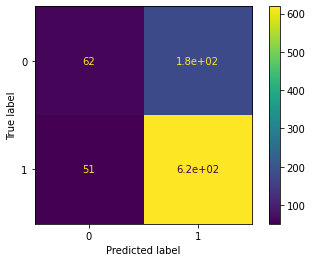

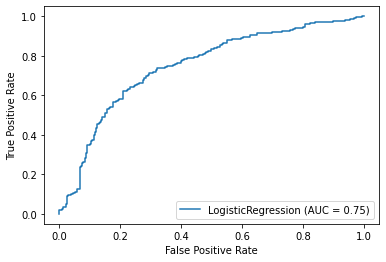

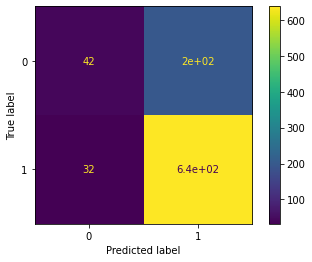

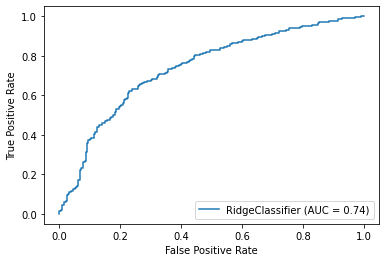

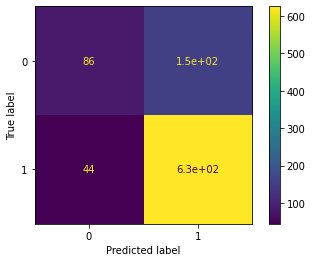

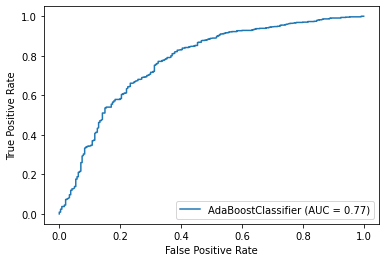

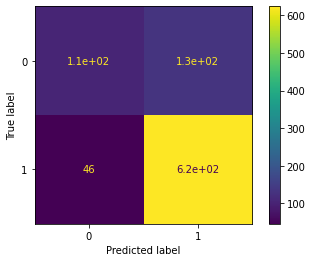

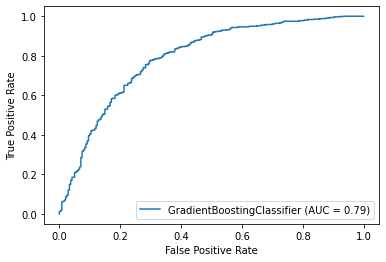

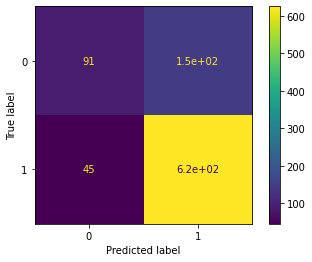

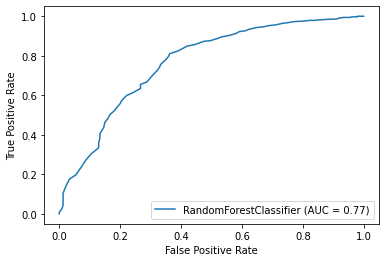

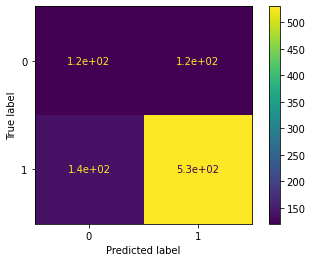

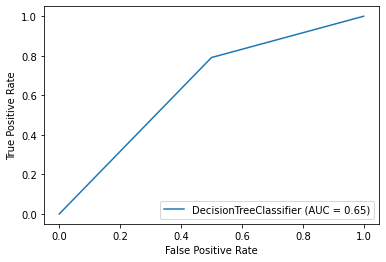

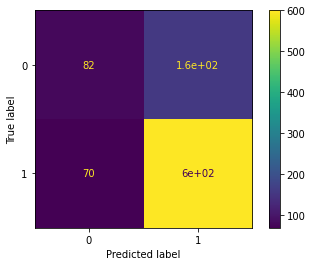

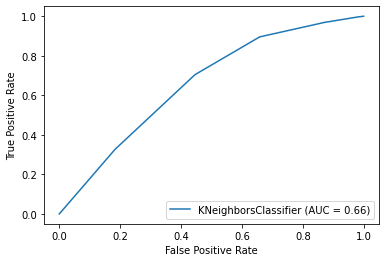

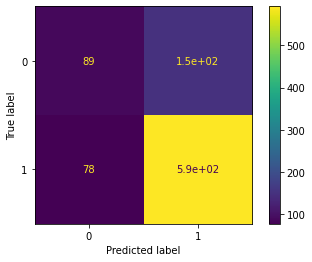

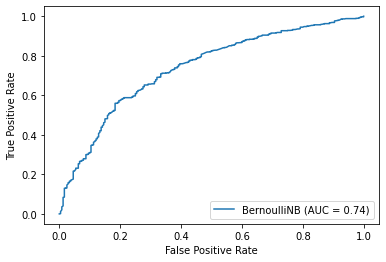

In [211]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train_smote,y_train_smote)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

contraception = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [212]:
contraception.sort_values(by='scores', ascending=False)

,names,scores,times
3,GradientBoostingClassifier,0.80,0.43
4,RandomForestClassifier,0.79,0.34
2,AdaBoostClassifier,0.78,0.20
6,KNeighborsClassifier,0.75,0.01
0,LogisticRegression,0.75,0.07
7,NaiveBayes,0.75,0.00
1,RidgeClassifier,0.75,0.01
5,DecisionTreeClassifier,0.71,0.02


In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
param_range = [1, 2, 3, 4, 5, 6]
from sklearn.svm import SVC
LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()
models2 = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

params2 = {
    'LogisticRegression': {},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]},
}

In [214]:
helper2 = EstimatorSelectionHelper(models2, params2)
helper2.fit(X, y, scoring='accuracy', n_jobs=-1)

Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    8.9s finished


In [215]:
model = helper2.score_summary(sort_by='max_score')
model[['estimator','max_score']].head()

LogisticRegression
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
DecisionTreeClassifier


,estimator,max_score
315,DecisionTreeClassifier,0.80
309,DecisionTreeClassifier,0.80
312,DecisionTreeClassifier,0.80
316,DecisionTreeClassifier,0.80
310,DecisionTreeClassifier,0.80


##**ANALYSIS**
**It can be seen that the dataset is dominated by the following characteristics:** 


* **The most representative regions of the dataset are**

  * **Artibonite (11%)**
  * **Rest-West (11%)**
  * **Northwest (11%)**

* **Geographics** 
  * **2/3 are from the North West**
  * **2/3 are from urban areas** * 


* **Education**
  * **Primary school (40%)**
  * **Secondary school (30)**
  * **No education (27%)**

* **Type Of Contraceptive Method Used**
  * **About 1/3 married women used injections as modern method**

* **Wealth index**
  * **50% of the women are situated in the poor category class**

* **Religion**
  * **52% are Prostestant**
  * **42% are Catholic**
  * **6% No Religion**

* **Profession**
  * **46% have their husbands working in agriculture**

* **Let's plot histogram for numeric variable**

**Apart from the variable Total_lifetime_number_of_sex_partners**.

**The variables:**
* Respondent_s_current_age
* Number_of_household_members
* Number_of_children_5_and_under_in_household',
* Age_of_respondent_at_1st_birth
* Number_of_living_children
* Age_at_first_cohabitation
* Years_since_first_cohabitation
* Husband_partner_s_age
 
**appear to be normally distributed but a chapiro test is required to better assess this assumption**.

## **ANALYSIS**

* **The correlation matrix shows that there is :**
    * **high correlation between 'Respondent_s_current_age' and 'Years_since_first_cohabitation' (r=0.82)**

    * **high correlation between 'Respondent_s_current_age' and 'Husband_partner_s_age' (r=0.74)**

    * **high correlation between 'Age_of_respondent_at_1st_birth' and 'Age_at_first_cohabitation' (r=0.74)**

    * **A correlation between 'Years_since_first_cohabitation' and 'Age_of_respondent_at_1st_birth' (r=0.67)**

* **These correlations means they could have an identical impact on target variable;**

    * **We can drop Years_since_first_cohabitation and Husband_partner_s_age, Age_at_first_cohabitation from dataset;**

##**CLUSTERING**

In [222]:
!pip install yellowbrick

In [223]:
from sklearn.cluster import KMeans

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f37aa3e6c10>,
                 k=None, metric=None, model=None, timings=True)

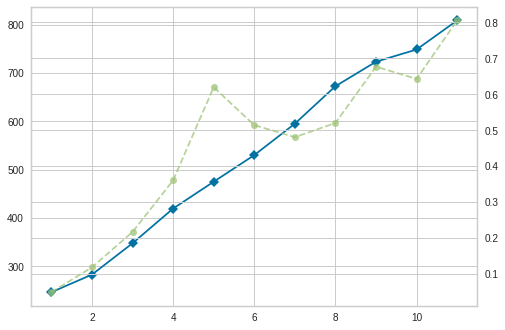

In [224]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
##visualizer.show()        # Finalize and render the figure

In [225]:
distances = []
nbr_clusters = []
for k in range(1,12):
  kmean = KMeans(n_clusters=k)
  kmean.fit(X)
  nbr_clusters.append(k)
  distances.append(kmean.inertia_)


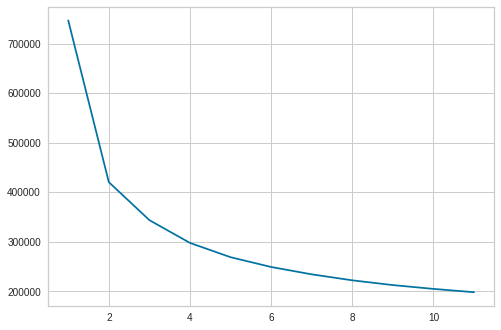

In [226]:
sns.lineplot(x=nbr_clusters,y=distances)

In [227]:
kmeans =KMeans(n_clusters=3)
kmeans.fit(X)
labels =kmeans.labels_

In [228]:
X['labels'] = labels

In [229]:
X.head()

,Respondent_s_current_age,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Age_of_most_recent_child,Age_at_first_cohabitation,Age_at_first_sex,Husband_partner_s_age,Highest_educational_level_Higher,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Other,Religion_Protestant,Religion_Vaudousant,Wealth_index_combined_Middle,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Visited_health_facility_last_12_months_No,Visited_health_facility_last_12_months_Yes,Husband_partner_s_education_level_Don't know,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Recent_sexual_activity_Active in last 4 weeks,Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence,Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence,Respondent_s_occupation_Agricultural - self employed,Respondent_s_occupation_Household and domestic,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales,Respondent_s_occupation_Skilled manual,Respondent_s_occupation_Unskilled manual,Respondent_s_occupation_Agricultural - self employed,Respondent_s_occupation_Household and domestic,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales,Respondent_s_occupation_Skilled manual,Respondent_s_occupation_Unskilled manual,labels
0,31,3,19.00,1.00,27,15,31,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,38,1,31.00,3.00,29,18,39,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,38,1,28.00,1.00,28,24,36,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,35,0,23.00,7.00,22,18,42,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,37,1,18.00,3.00,18,17,53,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2


In [230]:
labels1 = X[X.labels == 0].drop(columns=['labels']).mean()
labels2 = X[X.labels == 1].drop(columns=['labels']).mean()
labels3 = X[X.labels == 2].drop(columns=['labels']).mean()

In [231]:
columns =list(labels1.index)

In [232]:
categories = columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=labels1.values,
      theta=categories,
      fill='toself',
      name='Profile 1'
))
fig.add_trace(go.Scatterpolar(
      r=labels2.values,
      theta=categories,
      fill='toself',
      name='Profile 2'
))

fig.add_trace(go.Scatterpolar(
      r=labels3.values,
      theta=categories,
      fill='toself',
      name='Profile 3'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()